Stock     Est.Growth   Intrinsic Value   Current Price     Discount    Recommendation
--------------------------------------------------------------------------------------
COIN       -13.71%          283.58          194.37           45.9%              Buy
AVGO        16.12%          665.47          547.07          21.64%              Buy
PYPL        23.23%          121.93             168         -27.42%             Sell
PFE          3.21%           66.59           53.35          24.82%              Buy
F           13.43%           36.37           21.05          72.78%       Strong Buy
KO           5.93%           41.84           60.88         -31.27%             Sell
AMD         36.42%          115.37          122.13          -5.54%             Hold
ROKU        39.46%           139.8          153.87          -9.14%             Hold
PTON         1.28%               0           25.29         -100.0%      Strong Sell
QCOM        21.18%          216.53          169.02          28.11%     

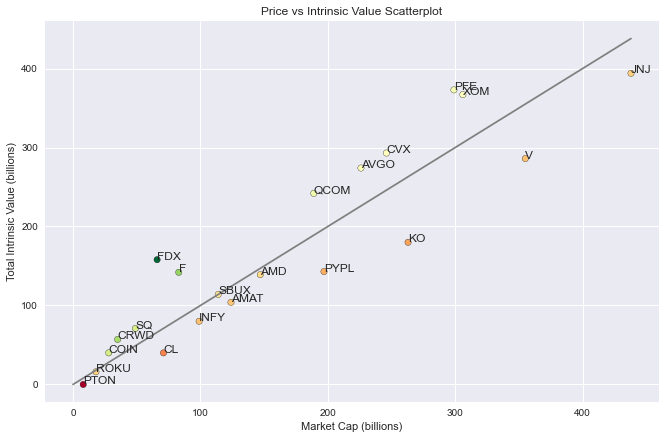

In [2]:
#ENTER ANY NUMBER OF STOCKS
stocks = ['COIN', 'AVGO','PYPL', 'PFE', 'F', 'KO', 'AMD', 'ROKU', 'PTON', 'QCOM', 'JNJ', 
          'CVX', 'V', 'FDX', 'SQ', 'CRWD', 'SBUX', 'AMAT', 'INFY', 'XOM', 'CL']
data = list()
import requests
import pandas as pd
import yfinance as yf
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt 

print ("{:<6} {:>13} {:>17} {:>15} {:>12} {:>17}".format('Stock','Est.Growth','Intrinsic Value','Current Price','Discount', 'Recommendation'))
print('--------------------------------------------------------------------------------------')

name = []
price = []
value = []
ratio = []

for stock in stocks:
    
    #LONG TERM GROWTH
    try:
        url = f'https://www.alphaquery.com/stock/{stock}/all-data-variables'
        headers = {'Accept': 'text/html'}
        res = requests.get(url, headers = headers)
        soup = BeautifulSoup(res.text, 'lxml')
        PE = soup.find_all('td', class_ = 'text-right')[164]
        PEG = soup.findAll('td', class_ = 'text-right')[166]
        LTGrowth = (float(PE.text)/float(PEG.text))
        
    except:
        try:
            url = f'https://www.marketwatch.com/investing/stock/{stock}/analystestimates?mod=mw_quote_tab'
            res = requests.get(url)
            soup = BeautifulSoup(res.text, 'lxml')
            thisyear = float(soup.findAll('th', class_ = "table__cell")[8].text.replace(',',''))
            nextyear = float(soup.findAll('th', class_ = "table__cell")[9].text.replace(',',''))
            if nextyear == 0:
                nextyear = .01
            nextyear2 = float(soup.findAll('th', class_ = "table__cell")[10].text.replace(',',''))
            if nextyear2 == 0:
                nextyear2 = .01
            nextyear3 = float(soup.findAll('th', class_ = "table__cell")[11].text.replace(',',''))
            if nextyear3 == 0:
                nextyear3 = .01
            a = ((nextyear - thisyear)/ abs(thisyear)) *100
            if a > 100:
                a = 100
            if a <= -100:
                a = -100
            b = ((nextyear2 - nextyear) / abs(nextyear)) *100 
            if b > 100:
                b = 100
            if b <= -100:
                b = -100
            c = ((nextyear3 - nextyear2)/ abs(nextyear2))*100
            if c > 100:
                c = 100
            if c <= -100:
                c = -100
            EPSGrowth = ((a+b+c)/3)
            EPSGrowth = float(format(EPSGrowth, ".4"))
            LTGrowth = EPSGrowth/2
            if LTGrowth > 40:
                LTGrowth = LTGrowth*.90
        except:
            try:
                url = f'https://www.marketwatch.com/investing/stock/{stock}/analystestimates?mod=mw_quote_tab'
                res = requests.get(url)
                soup = BeautifulSoup(res.text, 'lxml')
                nextyear = float(soup.findAll('th', class_ = "table__cell")[9].text.replace(',',''))
                if nextyear == 0:
                    nextyear = .01
                nextyear2 = float(soup.findAll('th', class_ = "table__cell")[10].text.replace(',',''))
                if nextyear2 == 0:
                    nextyear2 = .01
                nextyear3 = float(soup.findAll('th', class_ = "table__cell")[11].text.replace(',',''))
                if nextyear3 == 0:
                    nextyear3 = .01
                a = ((nextyear2 - nextyear) / abs(nextyear)) *100 
                if a > 100:
                    a = 100
                if a <= -100:
                    a = -100
                b = ((nextyear3 - nextyear2)/ abs(nextyear2))*100
                if b > 100:
                    b = 100
                if b <= -100:
                    b = -100
                EPSGrowth = (a+b)/2
                EPSGrowth = float(format(EPSGrowth, ".4"))
                LTGrowth = EPSGrowth/2
                if LTGrowth > 40:
                    LTGrowth = LTGrowth*.90 
            except:
                continue

    #PREVIOUS OPERATING CASH GROWTH
    try:
        url = f'http://www.aastocks.com/en/usq/analysis/company-fundamental/cash-flow?symbol={stock}'
        res = requests.get(url)
        soup = BeautifulSoup(res.text, 'lxml')
        point1 = float(soup.findAll('td')[130].text.replace(',',''))
        point2 = float(soup.findAll('td')[131].text.replace(',',''))
        point3 = float(soup.findAll('td')[132].text.replace(',',''))
        point4 = float(soup.findAll('td')[133].text.replace(',',''))
        point5 = float(soup.findAll('td')[134].text.replace(',',''))
     
        growth1 = ((point2-point1)/abs(point1))*100
        if growth1 > 100:
            growth1 = 100
        elif growth1 <-100:
            growth1 = -100
        growth2 = ((point3-point2)/abs(point2))*100
        if growth2 > 100:
            growth2 = 100
        elif growth2 <-100:
            growth2 = -100
        growth3 = ((point4-point3)/abs(point3))*100
        if growth3 > 100:
            growth3 = 100
        elif growth3 <-100:
            growth3 = -100
        growth4 = ((point5-point4)/abs(point4))*100
        if growth4 > 100:
            growth4 = 100
        elif growth4 <-100:
            growth4 = -100
        
        operating_cash_growth = ((growth1+growth2+growth3+growth4)/4)
        operating_cash_growth = round(operating_cash_growth, 2)
    
    except:
        operating_cash_growth = LTGrowth
    
    #PREVIOUS EPS GROWTH
    try:
        url = f'https://www.reuters.com/companies/{stock}.OQ/key-metrics'
        res = requests.get(url)
        soup = BeautifulSoup(res.text, 'lxml')
        PrevEPSGrowth = float(soup.findAll('span', class_ =  "TextLabel__text-label___3oCVw TextLabel__black___2FN-Z TextLabel__regular___2X0ym digits MarketsTable-value-FP5ul")[115].text) 
    except:
        PrevEPSGrowth = operating_cash_growth  
    
    
    try:
        if point1<point2 and point2<point3 and point3<point4 and point4<point5:
            actual_growth = LTGrowth*.75 + operating_cash_growth*.125 + PrevEPSGrowth*.125
        else:
            actual_growth = LTGrowth*.34 + operating_cash_growth*.33 + PrevEPSGrowth*.33
    except:
        actual_growth = operating_cash_growth 
    
    #DIVIDEND
    try:
        url = f'https://www.marketwatch.com/investing/stock/{stock}?mod=quote_search'
        res = requests.get(url)
        soup = BeautifulSoup(res.text, 'lxml')
        divid = soup.findAll('span', class_ = 'primary')[17]
        divid = str(divid.text).replace('$', '')
        dividend = (float(divid)*4*10)
    except:
        dividend = 0
    
    #OPERATING CASH TTM 
    try:
        stock = yf.Ticker(stock)
        operating_cash = float(stock.info['operatingCashflow'])
       
    except:
        continue 
        
    #CURRENT DISCOUNT RATE
    try:
        beta = stock.info['beta']
        if beta < .80:
            discountrate = .05
        elif .80<beta<=1:
            discountrate = .06
        elif 1<beta<=1.1:
            discountrate = .065
        elif 1.1<beta<=1.2:
            discountrate = .07
        elif 1.2<beta<=1.3:
            discountrate = .075
        elif 1.3<beta<=1.4:
            discountrate = .08
        elif 1.4<beta<=1.5999:
            discountrate = .085
        else:
            discountrate = .09
    except:
        discountrate = .06
        
    #PROJECTED CASH FLOW BY YEAR
    actual_growth = actual_growth/100
    if operating_cash > 0:
        total_cash_yr1 = (operating_cash *(1+actual_growth))
        total_cash_yr2 = total_cash_yr1*(1+actual_growth)
        total_cash_yr3 = total_cash_yr2*(1+actual_growth)
        total_cash_yr4 = total_cash_yr3*(1+actual_growth)
        total_cash_yr5 = total_cash_yr4*(1+actual_growth)
        total_cash_yr6 = total_cash_yr5*(1+actual_growth)
        total_cash_yr7 = total_cash_yr6*(1+actual_growth)
        total_cash_yr8 = total_cash_yr7*(1+actual_growth)
        total_cash_yr9 = total_cash_yr8*(1+actual_growth)
        total_cash_yr10 = total_cash_yr9*(1+actual_growth)
    else:
        total_cash_yr1 = operating_cash
        total_cash_yr2 =  operating_cash - operating_cash*actual_growth
        total_cash_yr3 = total_cash_yr2 + ((operating_cash-total_cash_yr2)*-1)*(1+actual_growth)
        total_cash_yr4 = total_cash_yr3 + ((total_cash_yr2-total_cash_yr3)*-1)*(1+actual_growth)
        total_cash_yr5 = total_cash_yr4 + ((total_cash_yr3-total_cash_yr4)*-1)*(1+actual_growth)
        total_cash_yr6 = total_cash_yr5 + ((total_cash_yr4 - total_cash_yr5)*-1)*(1+actual_growth)
        total_cash_yr7 = total_cash_yr6 + ((total_cash_yr5 - total_cash_yr6)*-1)*(1+actual_growth)
        total_cash_yr8 = total_cash_yr7 + ((total_cash_yr6 - total_cash_yr7)*-1)*(1+actual_growth)
        total_cash_yr9 = total_cash_yr8 + ((total_cash_yr7- total_cash_yr8)*-1)*(1+actual_growth)
        total_cash_yr10 = total_cash_yr9 + ((total_cash_yr8 - total_cash_yr9)*-1)*(1+actual_growth)
        
    #DISCOUNT RATES PER YEAR
    dr1 = 1/(1+discountrate)
    dr2 = 1/(1+discountrate)**2
    dr3 = 1/(1+discountrate)**3
    dr4 = 1/(1+discountrate)**4
    dr5 = 1/(1+discountrate)**5
    dr6 = 1/(1+discountrate)**6
    dr7 = 1/(1+discountrate)**7
    dr8 = 1/(1+discountrate)**8
    dr9 = 1/(1+discountrate)**9
    dr10 = 1/(1+discountrate)**10
    
    #DISCOUNTED CASH BY YEAR
    net_yr1 = dr1 * total_cash_yr1
    net_yr2 = dr2 * total_cash_yr2
    net_yr3 = dr3 * total_cash_yr3
    net_yr4 = dr4 * total_cash_yr4
    net_yr5 = dr5 * total_cash_yr5
    net_yr6 = dr6 * total_cash_yr6
    net_yr7 = dr7 * total_cash_yr7
    net_yr8 = dr8 * total_cash_yr8
    net_yr9 = dr9 * total_cash_yr9
    net_yr10 = dr10 * total_cash_yr10
    
    #SHARES OUTSTANDING
    try:
        shares_outstanding = stock.info['sharesOutstanding']
    except:
        continue
    
    #COMPANY NAME
    company_name = stock.info['shortName']
    
    #TICKER SYMBOL
    symbol = stock.info['symbol']
    
    #TOTAL CASH
    try:
        total_cash_final = stock.info['totalCash']
        total_cash_final = float(total_cash_final)
    except:
        continue
        
    #TOTAL DEBT
    try:
        total_debt_final = stock.info['totalDebt']
        total_debt_final = float(total_debt_final)
    except:
        continue

    #TOTAL CASH FLOW OVER 10 YEARS
    total_cash_net = net_yr1 + net_yr2 + net_yr3 + net_yr4 + net_yr5 + net_yr6 +net_yr7+net_yr8+net_yr9 + net_yr10
    
    #GROSS INTRINSIC VALUE
    try:
        gross_intrinsic_value = total_cash_net/shares_outstanding
    except:
        continue
    
    #CASH PER SHARE
    cash_per_share = total_cash_final/shares_outstanding
    
    #DEBT PER SHARE
    debt_per_share = total_debt_final/shares_outstanding
    
    #INTRINSIC VALUE 
    intrinsic_value = gross_intrinsic_value + dividend + cash_per_share - debt_per_share
    intrinsic_value = "{:.2f}".format(intrinsic_value)
    intrinsic_value = float(intrinsic_value)
    if intrinsic_value <0:
        intrinsic_value = 0
        
    #currentprice
    current_price = stock.info['currentPrice']
    current_price = round(current_price, 2)
    
    #DISCOUNT
    discount = ((intrinsic_value-current_price)/current_price)*100
    discount = round(discount, 2)
    if discount > 50:
        recommendation = 'Strong Buy'
    elif 15 <= discount <= 50:
        recommendation = "Buy"
    elif -15 < discount < 15:
        recommendation = "Hold"
    elif -50 < discount <= -15:
        recommendation = "Sell"
    else:
        recommendation = "Strong Sell"

    actual_growth = round(actual_growth*100, 2)   
    
    #OPTIONAL DATAFRAME FORMAT OF THE DATA, USE THIS IF YOU WANT TO EXPORT TO EXCEL
    data.append({
        'Company': company_name,
        'Ticker': symbol,
        'LT Growth Est.': "{:.1f}".format(actual_growth),
        'Stock Intrinsic Value': intrinsic_value,
        'Current Price': current_price,
        'Discount %': "{:.1f}".format(discount),
        'Recommendation': recommendation
    })
    
    stats = pd.DataFrame(data)
    marketcap = int(round((current_price*shares_outstanding)/1000000000, 0))
    intrinsic_market_cap = int(round((intrinsic_value*shares_outstanding)/1000000000, 2))
   
    print(f"{symbol:<5}{actual_growth:>12}%{intrinsic_value:>16}{current_price:>16}{discount:>15}%{recommendation:>17}")
    name.append(symbol)
    price.append(marketcap)
    value.append(intrinsic_market_cap)
    ratio.append(intrinsic_value/current_price)
    
plt.figure(figsize=(11, 7))
plt.style.use('seaborn')
plt.title('Price vs Intrinsic Value Scatterplot')
plt.xlabel('Market Cap (billions)')
plt.ylabel('Total Intrinsic Value (billions)') 
import matplotlib.colors as mcolors 
mcolors.TwoSlopeNorm(vcenter = 1)
plt.scatter(price, value, s = 40, c = ratio, edgecolor = 'k', cmap = 'RdYlGn')
for i, label in enumerate(name):
    plt.annotate(label, (price[i], value[i]), size = 12)
try:
    myMax = max(max(price), max(value))
    plt.plot([0,myMax], [0,myMax], color = 'gray')
    plt.show()
except:
    print(stock, "\t   No data")
    